In [5]:
import os

import pandas as pd
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

In [6]:
time = np.load('./data/time.npy')
freq = np.load('./data/freq.npy')

In [7]:
print(time.shape)
print(freq.shape)

(13,)
(176,)


In [8]:
# For training data (day 1, 2, 3, 4)
X_train = np.load('./data/X_train_mouse02.npy')
Y_train = np.load('./data/Y_train_mouse02.npy')

# For testing data (day 5)
X_test = np.load('./data/X_test_mouse02.npy')
Y_test = np.load('./data/Y_test_mouse02.npy')

# Check shapes
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (22992, 13, 176)
Y_train shape: (22992,)
X_test shape: (5748, 13, 176)
Y_test shape: (5748,)


In [9]:
# Check shapes
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (22992, 13, 176)
Y_train shape: (22992,)
X_test shape: (5748, 13, 176)
Y_test shape: (5748,)


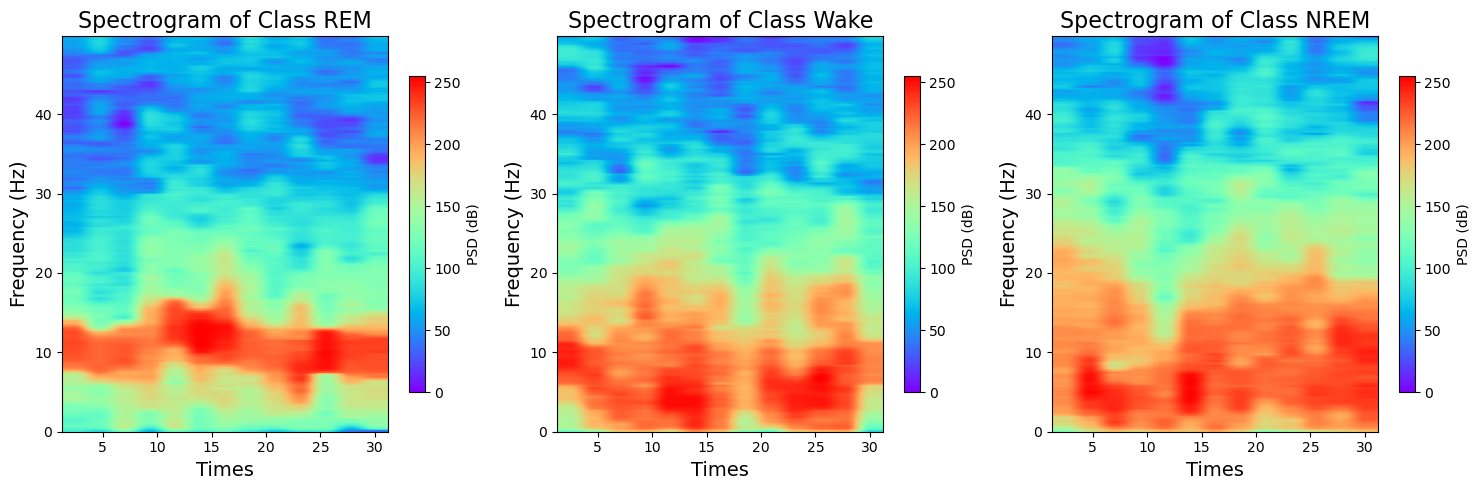

In [10]:
from matplotlib import colormaps

# Plot spectrogram images of each class
encountered_labels = set()
classes = ['REM', 'Wake', 'NREM']
spectro_of_3_classes = [[] for _ in range(3)]

for i, label in enumerate(Y_test.flatten()):
    if label in [0, 1, 2] and label not in encountered_labels:
        if(label == 0):
            spectro_of_3_classes[0] = (X_test[i])
        if(label == 1):
            spectro_of_3_classes[1] = (X_test[i])
        if(label == 2):
            spectro_of_3_classes[2] = (X_test[i])
        encountered_labels.add(label)
    if len(encountered_labels) == 3:
        break

# Visualize spectrograms
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=False, sharey=False)

for i in range(3):
    # Visualize the spectrogram
    spectro_of_3_classes[i] = np.transpose(spectro_of_3_classes[i])
    im = axes[i].imshow(spectro_of_3_classes[i], aspect='auto', origin='lower', extent=[time[0], time[-1], freq[0], freq[-1]])
    fig.colorbar(im, ax=axes[i], label='PSD (dB)', shrink=0.8)
    im.set_cmap(colormaps.get_cmap('rainbow'))
    # im.set_clim([5, 28])
    axes[i].set_xlabel("Times", fontsize=14)
    axes[i].set_ylabel("Frequency (Hz)", fontsize=14)
    axes[i].set_title(f"Spectrogram of Class {classes[i]}", fontsize=16)

plt.tight_layout()
plt.show()

In [11]:
print(classes[0])
print(classes[1])
print(classes[2])

REM
Wake
NREM


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 데이터 평탄화 및 정규화
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flattened)
X_test_scaled = scaler.transform(X_test_flattened)

# GridSearchCV 설정 - 교차 검증 (Cross-Validation)
# 데이터 세트를 k개의 부분으로 나누고, 하나의 부분을 테스트 세트로, 나머지를 훈련 세트로 사용하여 모델을 평가합.
# 이 과정을 모든 부분에 대해 반복하고, 다양한 K값에 대해 평균 예측 성능을 계산. 가장 좋은 성능을 보이는 K값을 선택.
k_values = list(range(1, 11, 2))  # 1, 3, 5, 7, 9
param_grid = {'n_neighbors': k_values}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# 모델 훈련
grid_search.fit(X_train_scaled, Y_train)

# 최적의 K 값 출력
best_k = grid_search.best_params_['n_neighbors']
print(f'Best K value: {best_k}')

# 최적의 K 값으로 모델 재훈련
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, Y_train)

# 테스트 데이터로 예측 및 정확도 출력
Y_pred = knn_best.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')


Best K value: 9
Accuracy: 0.87
